# Perceptron

É o modelo mais simples de neurônio artificial. Aqui, será usado para *classificação binária* de amostras de uma base de dados.

Sua estrutura é mostrada a seguir:

<img src='imagens/perceptron.png' width='400'>

Onde:
- $x = x_1, x_2, ... , x_D$ é o vetor de dados de entrada;
- $w = w_1, w_2, ... , w_D$ é o vetor de pesos, que serão ajustados a cada amostra passada ao Perceptron;
- $b$ é o **bias**, um parâmetro característico do problema, que também será ajustado no processo;
- O somatório representa a **junção aditiva**. Ela relaiza o seguinte cálculo: $ja = x_1w_1 + x_2w_2 + ... + x_Dw_D + b$;
- $f$ é a **função de ativação** do neurônio. Ela recebe o resultado da junção aditiva e se comporta da seguinte maneira:
    - Se $ja > 0$, $f(ja) = 1$;
    - Se $ja < 0$, $f(ja) = 0$;
- $y$ é a saída do Perceptron, ou seja, a classe ($0$ ou $1$) a que a amostra de entrada ($x$) pertence;

## Regra de aprendizado

Usaremos uma técnica de aprendizado supervizionado. Assim, vamos definir algumas variáveis:
- $y_{Percep}$ como a saída do Perceptron (classe prevista) para uma determinada amostra;
- $y_{Real}$ como a classe a qual a amostra realmente pertence;
- $ta$ como a taxa de aprendizagem do Perceptron;

As fórmulas para atualização do vetor de pesos e do bias são dadas a seguir:

$$w_i = w_i + ta.\left(y_{Real}-y_{Percep}\right).x_i$$
$$b = b + ta.\left(y_{Real}-y_{Percep}\right)$$


## 0. Importações

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import matplotlib.animation as animation

## 1. Dados

Usaremos um dataset com amostras de tumores de câncer de mama.

In [2]:
# Dados referentes às características do tumor. Ao todo, são 569 amostras, cada uma com 30 características.
amostras = pd.read_csv('dados/breast_cancer_amostras.csv')
amostras

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000


In [3]:
# Dados referentes à classe do tumor (benigno x maligno).
classes = pd.read_csv('dados/breast_cancer_classes.csv')
classes

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [4]:
# Divisão dos dados em treinamento (75%) e teste (25%).
from sklearn.model_selection import train_test_split
amostras_treino_df, amostras_teste_df, classes_treino_df, classes_teste_df = train_test_split(amostras, classes)

In [5]:
# Convertendo os dados em listas, para tornar mais fácil a manipulação e prevenir erros de tipo.  
def dataframe_to_lista(quant_amostras, amostras_df, classes_df):
    amostras_lista = []
    classes_lista = []
    for i in range(quant_amostras):
        amostras_lista.append(amostras_df.values[i])
        classes_lista.append(classes_df.values[i][0])
    return amostras_lista, classes_lista

quant_amostras_treino = amostras_treino_df.shape[0]
amostras_treino, classes_treino = dataframe_to_lista(quant_amostras_treino, amostras_treino_df, classes_treino_df)
quant_amostras_teste = amostras_teste_df.shape[0]
amostras_teste, classes_teste = dataframe_to_lista(quant_amostras_teste, amostras_teste_df, classes_teste_df)

## 2. Estrutura do Perceptron

A seguir, definiremos uma função que modela o Perceptron. 

Ela recebe um vetor de entrada ($x$), um de pesos ($w$) e um valor de bias ($b$). Após realizar o cálculos, retorna $y_{Percep}$.

In [6]:
# Função de Ativação.
def funcao_de_ativacao(juncao_de_ativacao):
    if (juncao_de_ativacao >= 0):
        return 1
    else:
        return 0

In [7]:
# Função que modela o perceptron.
def perceptron(entrada, pesos, bias):
    juncao_de_ativacao = 0
    for i in range(len(entrada)):
        juncao_de_ativacao = juncao_de_ativacao + entrada[i]*pesos[i]
        
    juncao_de_ativacao = juncao_de_ativacao + bias
    
    y_percep = funcao_de_ativacao(float(juncao_de_ativacao))
    return y_percep

In [8]:
# Função para atualização dos pesos.
def atualiza_pesos(pesos, taxa_de_aprendizagem, y_real, y_percep, entrada):
    for i in range(len(pesos)):
        pesos[i] = pesos[i] + taxa_de_aprendizagem*(y_real-y_percep)*entrada[i]
    return pesos

In [9]:
# Função para atualização do bias:
def atualiza_bias(bias, taxa_de_aprendizagem, y_real, y_percep):
    bias = bias + taxa_de_aprendizagem*(y_real-y_percep)
    return bias

In [10]:
# Função para geração aleatória do vetor de pesos inicial.
def gera_pesos_iniciais(quant_pesos):
    pesos = []
    for i in range(quant_pesos):
        zero_ou_um = randint(0, 1)
        pesos.append(zero_ou_um)
    return pesos

In [138]:
# Função para plotagem das variáveis ao longo do treinamento e do teste do Perceptron.
def plot_perceptron(amostras, classes, pesos, bias):
    plt.figure(figsize=(16, 8))
    
    plt.subplot(211)
    numero_da_caracteristica = np.arange(1, len(amostras[0])+1, 1)    
    plt.stem(numero_da_caracteristica, pesos, use_line_collection=True)
    plt.grid()
    t = 'Bias = ' + str(bias)
    plt.title(t, fontweight="bold") 
    plt.xlabel('Número da Caracterísitca')
    plt.ylabel('Pesos sinápticos')
    """
    plt.subplot(212)
    numero_de_amostras = np.arange(1, len(amostras)+1, 1)    
    plt.scatter(numero_de_amostras, classes)
    plt.grid()
    plt.xlabel('Número da Amostra')
    plt.ylabel('Classes')"""

## 3. Treinando o Perceptron

Agora vamos passar todas as amostras (linhas do dataframe 'entradas_treino') de treino para o perceptron.

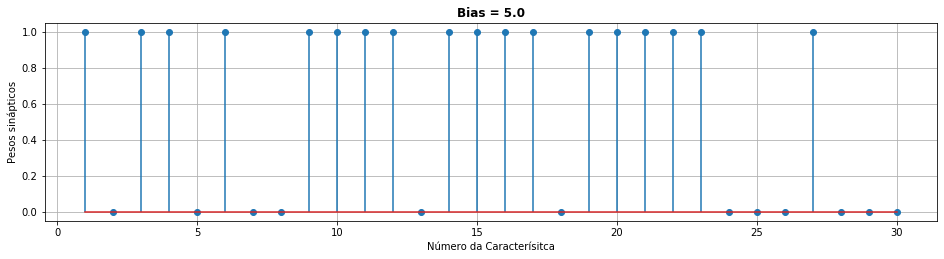

In [155]:
# Parâmetros iniciais.
quant_pesos = len(amostras_treino[0])
pesos = gera_pesos_iniciais(quant_pesos)
bias = 5.0
taxa_de_aprendizagem = 0.01
plot_perceptron(amostras_treino, classes_treino, pesos, bias)

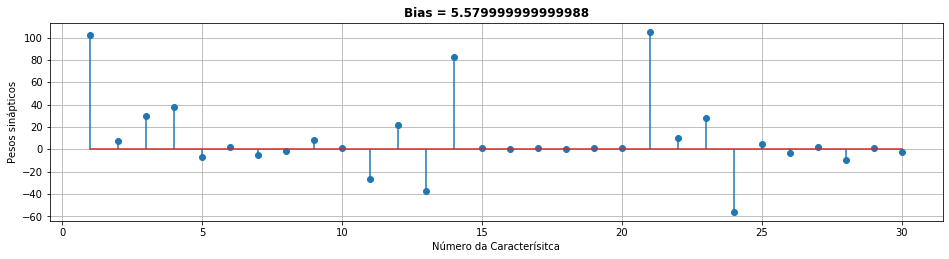

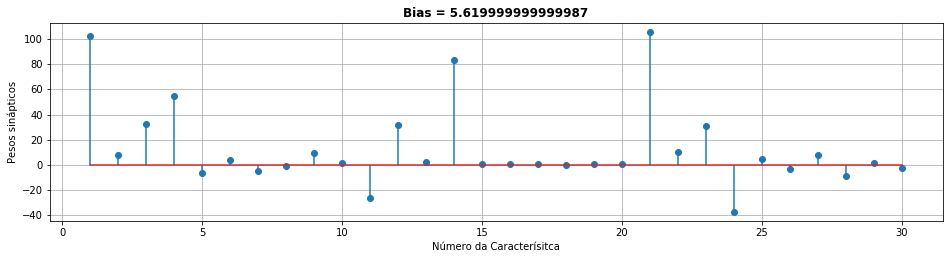

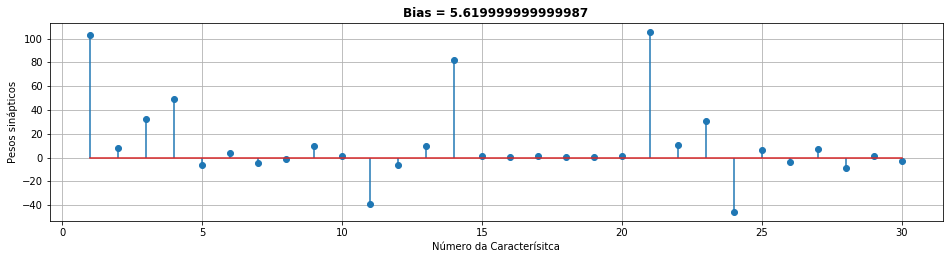

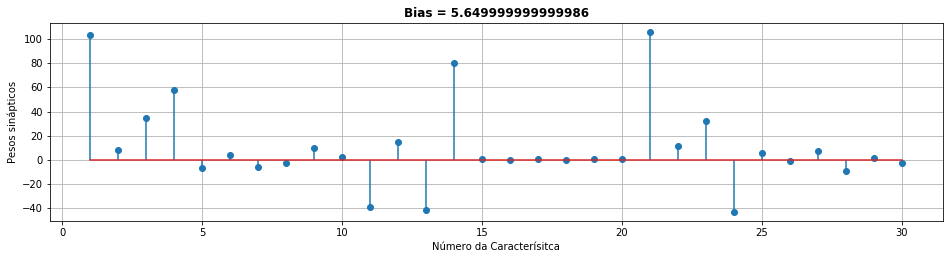

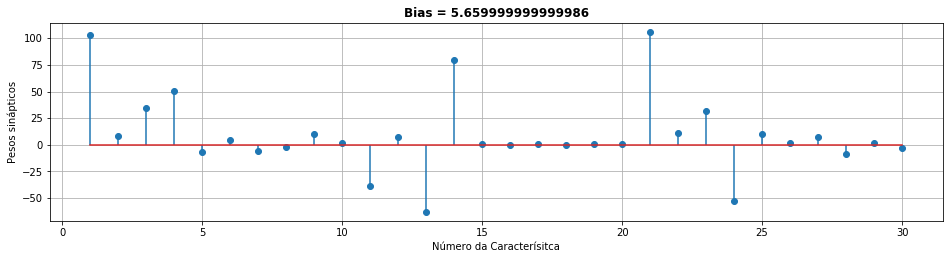

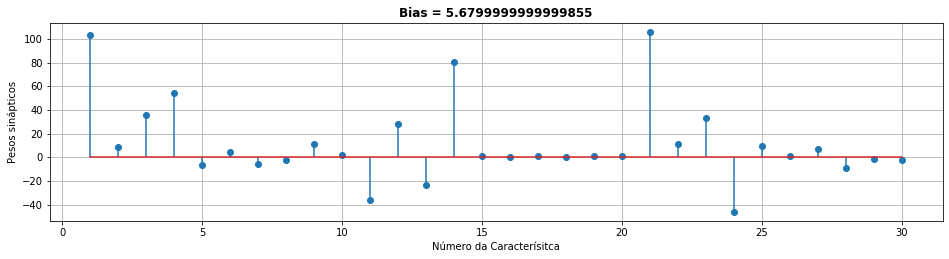

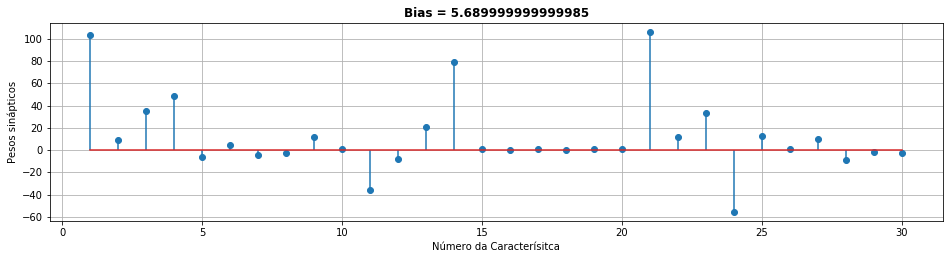

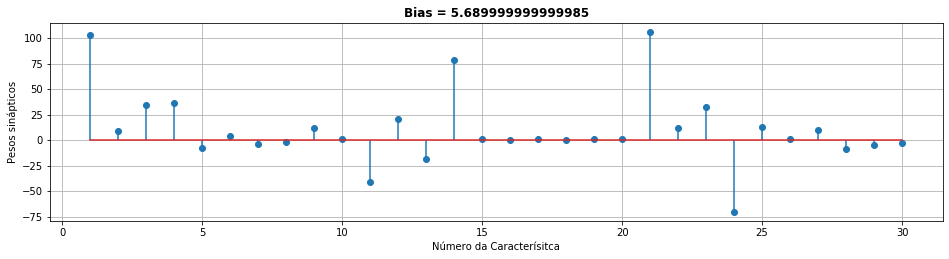

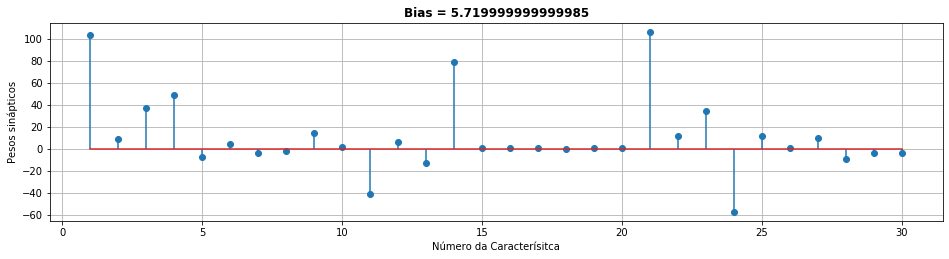

In [ ]:
# Treino do Perceptron.
quant_amostras_treino = len(amostras_treino)

for i in range(quant_amostras_treino):
    entrada = amostras_treino[i]
    
    y_real = classes_treino[i]
    y_percep = perceptron(entrada, pesos, bias)
    
    pesos = atualiza_pesos(pesos, taxa_de_aprendizagem, y_real, y_percep, entrada)
    bias = atualiza_bias(bias, taxa_de_aprendizagem, y_real, y_percep) 
    
    if (i%10 == 0):
        plot_perceptron(amostras_treino, classes_treino, pesos, bias)  
        
# https://pt.stackoverflow.com/questions/335005/como-fazer-gr%C3%A1ficos-din%C3%A2micos-no-python-3

In [30]:
cont

426

In [68]:
x = numero_da_caracteristica = np.arange(1, 31, 1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [92]:
x = np.arange(1, 42, 1) 
x[]

1